URL Dashboard : https://public.tableau.com/views/StudentPerformanceAnalysisBasedonJAMBScores/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# i. Perkenalan

----------------------------------------------

NAMA : MICHAEL WILBERT PURADISASTRA

----------------------------------------------

# ii. Identifikasi Masalah

**Topik Permasalahan**:
Faktor-faktor yang Mempengaruhi Skor JAMB pada Siswa di Tahun 2024

**Problem Statement**:
Menganalisis faktor-faktor yang memengaruhi pencapaian skor JAMB di atas batas minimal 200 pada tahun 2024, serta memberikan rekomendasi kepada guru dan fakultas untuk intervensi yang tepat guna mendukung peningkatan hasil siswa.

**Latar Belakang**:
Skor JAMB adalah indikator utama kesiapan siswa masuk perguruan tinggi di Nigeria. Berbagai faktor seperti kebiasaan belajar, kualitas guru, keterlibatan orang tua, dan status sosial ekonomi diduga memengaruhi pencapaian skor. Data terbaru tahun 2024 memungkinkan analisis variabel seperti jam belajar, kehadiran, kualitas guru, jenis sekolah, keterlibatan orang tua, dan tugas siswa. Analisis ini diharapkan membantu guru dan fakultas mengidentifikasi faktor kunci yang memengaruhi hasil siswa dan menerapkan dukungan akademis yang lebih efektif sebelum pelaksanaan JAMB.

**Penjabaran Masalah dengan Metode 5W+1H**:
***What***:
Apa faktor utama yang memengaruhi skor JAMB siswa?

Apakah kebiasaan belajar, kualitas pengajaran, atau tingkat kehadiran menjadi penentu terbesar?

***Who***:
Siswa dengan profil apa yang cenderung meraih skor JAMB lebih tinggi?

Apakah keterlibatan orang tua dan latar belakang sosial ekonomi berperan penting dalam hasil?

***Where***:
Apakah lokasi sekolah (urban vs rural) dan jenis sekolah (negeri vs swasta) mempengaruhi performa siswa dalam JAMB?

***When***:
Kapan waktu yang paling efektif bagi siswa untuk belajar dalam persiapan JAMB, berdasarkan analisis data jam belajar per minggu?

***Why***:
Mengapa kualitas pengajaran dan akses ke sumber belajar tambahan sangat mempengaruhi hasil JAMB?

Mengapa siswa dari keluarga dengan status sosial ekonomi tertentu lebih cenderung mencapai skor rendah?

***How***:
Bagaimana guru dapat memanfaatkan data ini untuk memberikan intervensi yang tepat guna meningkatkan performa siswa di JAMB?

Bagaimana dukungan akademik tambahan, seperti les tambahan atau akses materi, dapat diimplementasikan secara efektif?

**Analisis SWOT**:

***Strengths***:
Guru memiliki akses ke data yang dapat memberikan wawasan mendalam terkait kebiasaan belajar siswa, kehadiran, dan keterlibatan orang tua, yang bisa dimanfaatkan untuk intervensi akademis.

***Weaknesses***:
Beberapa sekolah mungkin memiliki keterbatasan dalam fasilitas dan akses ke materi pembelajaran yang berkualitas, yang dapat menghambat siswa mencapai skor tinggi.

***Opportunities***:
Memanfaatkan teknologi untuk memperluas akses siswa ke sumber daya pembelajaran dan pelatihan tambahan di luar jam sekolah dapat meningkatkan hasil JAMB.

***Threats***:
Keterlibatan orang tua yang rendah dan kualitas pengajaran yang kurang di beberapa sekolah dapat menjadi hambatan dalam membantu siswa mencapai skor yang optimal.

# iii. Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Loading data dari local
file_path = 'jamb_exam_results.csv'
df = pd.read_csv(file_path)

# Menunjukan beberapa contoh data
df.head()


,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


Dataset ini dapat diakses melalui URL berikut: Kaggle Dataset - Kinerja Siswa dalam JAMB 2024.

Dalam kasus ini, lebih dpilih proses download data terlebih dahulu dan bekerja dari local, karena koneksi local umumnya lebih cepat, lebih aman, serta menghindari masalah seperti batasan kuota API atau kendala konektivitas.

Selain itu, dengan menggunakan file local, data dapat lebih cepat dimuat ulang dan diexplore tanpa harus terus-menerus mengakses API, sehingga proses analisis menjadi lebih lancar dan efisien.

Cek Missing Value, Data Summary dan Data Types

In [2]:
# Check for missing values
df.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [3]:
# Summary dataset
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


Dataset ini terdiri dari 17 column dan 5.000 rows. Ditemukan adanya nilai yang hilang pada column "Parent_Education_Level". Masalah muncul karena string 'None' diinterpretasikan sebagai NaN, padahal dalam konteks ini seharusnya mewakili "No Formal Education". Untuk mengatasi hal ini, nilai NaN akan diganti dengan label "No Formal Education" pada langkah selanjutnya.

In [4]:
# Check tipe data setiap column
df.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

**Insights**:
- **Columns**: Sebanyak 17 kolom mewakili berbagai faktor yang berpotensi mempengaruhi performa siswa dalam ujian JAMB, seperti kebiasaan belajar, jenis sekolah, dan status sosial ekonomi.
- **Rows**: Setiap baris dari 5.000 baris merepresentasikan seorang siswa, mencakup informasi demografi, latar belakang pendidikan, dan atribut relevan lainnya.
- **Missing Values**: Data yang hilang pada kolom "Parent_Education_Level" dianggap signifikan karena tingkat pendidikan orang tua dapat menjadi faktor penting dalam mempengaruhi kesuksesan akademik siswa. Dengan menangani nilai yang hilang ini, akurasi dan kelengkapan dataset untuk analisis lebih lanjut akan terjamin.

# iv. Data Cleaning

In [5]:
# Mengubah nilai NaN pada 'Parent_Education_Level' dengan 'No Formal Education'
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('No Formal Education')

In [6]:
# Check missing values
df.isnull().sum()

JAMB_Score                      0
Study_Hours_Per_Week            0
Attendance_Rate                 0
Teacher_Quality                 0
Distance_To_School              0
School_Type                     0
School_Location                 0
Extra_Tutorials                 0
Access_To_Learning_Materials    0
Parent_Involvement              0
IT_Knowledge                    0
Student_ID                      0
Age                             0
Gender                          0
Socioeconomic_Status            0
Parent_Education_Level          0
Assignments_Completed           0
dtype: int64

# v. Analisis dan Perhitungan

1. Statistik Deskriptif: **Central Tendency**

Penjabaran Masalah:
Kita ingin mengetahui rata-rata (mean), median, dan modus dari skor JAMB siswa untuk mendapatkan gambaran umum mengenai performa keseluruhan siswa dalam ujian. Selain itu, kita juga akan memeriksa distribusi skor untuk memahami bagaimana skor tersebar di antara siswa, apakah ada kecenderungan skor tertentu yang sering muncul, serta apakah skor JAMB memiliki penyebaran yang simetris atau tidak.

Langkah-langkah Analisis:

- Hitung mean untuk mengetahui nilai rata-rata skor JAMB.
- Hitung median untuk mengetahui nilai tengah, yang lebih tahan terhadap outlier.
- Hitung modus untuk mengetahui skor yang paling sering muncul.

Tujuan:
Menjawab pertanyaan seperti: Berapa nilai rata-rata, median, dan modus dari skor JAMB siswa? Bagaimana penyebaran skor JAMB di antara siswa, dan apakah terdapat outliers atau kecenderungan skor yang sangat tinggi/rendah?

Mean JAMB Score: 174.0746
Median JAMB Score: 170.0
Modus JAMB Score: 118


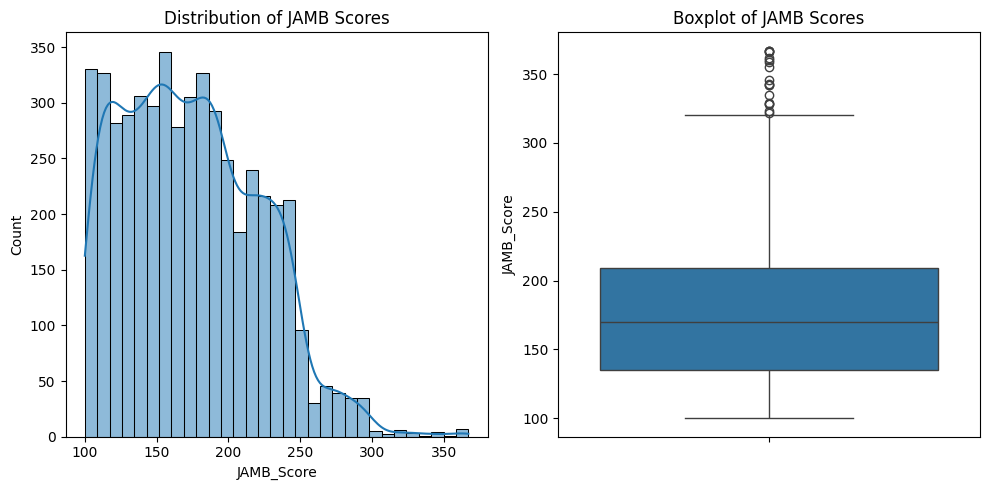

In [7]:
# Perhitungan Central Tendency
mean_score = df['JAMB_Score'].mean()
median_score = df['JAMB_Score'].median()
mode_score = df['JAMB_Score'].mode()[0]

print(f"Mean JAMB Score: {mean_score}")
print(f"Median JAMB Score: {median_score}")
print(f"Modus JAMB Score: {mode_score}")

# Visualisasi
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['JAMB_Score'], kde=True)
plt.title('Distribution of JAMB Scores')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(df['JAMB_Score'])
plt.title('Boxplot of JAMB Scores')

plt.tight_layout()
plt.show()


Analisis deskriptif memberikan gambaran umum mengenai data, seperti bagaimana distribusi skor JAMB di kalangan siswa. Berdasarkan hasil statistik deskriptif, rata-rata skor JAMB siswa adalah 174.07, dengan median 170.0 dan modus 118. Rata-rata ini menunjukkan bahwa sebagian besar siswa belum mencapai skor 200, yang dianggap sebagai ambang batas untuk hasil yang baik. Dengan median yang lebih rendah dari 200, ini berarti 50% dari siswa memiliki skor di bawah 170, memperlihatkan bahwa mayoritas siswa belum berhasil mencapai standar yang diharapkan. Modus 118 menunjukkan bahwa skor ini adalah yang paling sering muncul di antara siswa, menandakan bahwa banyak siswa mendapat nilai jauh di bawah ambang batas, yang bisa jadi merupakan indikator adanya tantangan dalam proses belajar mereka.

Dengan hasil ini, ada beberapa rekomendasi yang dapat diambil. Pertama, sekolah dan lembaga pendidikan perlu memberikan intervensi akademis, seperti tambahan bimbingan belajar atau materi penguatan, untuk membantu lebih banyak siswa mencapai skor yang lebih tinggi. Kedua, dengan banyaknya siswa yang mendapatkan skor rendah, penting untuk meneliti penyebab spesifik yang mungkin memengaruhi performa siswa, seperti kualitas pengajaran, keterlibatan orang tua, atau akses terhadap sumber daya belajar. Perbaikan sistem evaluasi dan dukungan motivasi bagi siswa yang berpotensi bisa membantu meningkatkan hasil di masa depan.

2. Statistik Inferensial: **Uji Chi-Square untuk Hubungan Keterlibatan Orang Tua dan Skor JAMB**

Penjabaran Masalah:
Kita ingin mengetahui apakah ada hubungan yang signifikan antara Variabel (Selain Student_ID) dengan performa siswa di ujian JAMB. Dengan menggunakan uji Chi-Square, kita dapat menentukan apakah keterlibatan orang tua memiliki dampak signifikan terhadap skor JAMB, atau apakah keterkaitan tersebut hanya kebetulan.

Langkah-langkah Analisis:

Tentukan hipotesis:

***H0***: Variabel dan skor JAMB siswa tidak saling terkait (independen).

***H1***: Variabel dan skor JAMB siswa saling terkait (tergantung).

Dilakukan uji Chi-Square untuk mengetahui hubungan antara dua variabel kategori: variabel dan "JAMB Score" (bisa dikategorikan sebagai skor tinggi dan rendah).
Kemudian ditentukan nilai p-value dan interpretasikan hasilnya.

Tujuan:
Menjawab pertanyaan seperti: Apakah keterlibatan orang tua / lokasi sekolah, dll. berhubungan signifikan dengan skor JAMB siswa? Jika iya, apakah tingkat keterlibatan yang lebih tinggi meningkatkan performa siswa dalam ujian JAMB?



In [8]:
# Buat kolom baru 'JAMB_Category'
threshold = 200
df['JAMB_Category'] = pd.cut(df['JAMB_Score'], bins=[0, threshold, df['JAMB_Score'].max()], labels=['Low', 'High'])

# Mengkategorikan kolom umur
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 18, 25, 100], labels=['<18', '18-25', '>25'])

# Chi-Square test
categorical_columns = ['School_Type', 'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
                       'Parent_Involvement', 'IT_Knowledge', 'Age_Category', 'Gender', 'Socioeconomic_Status', 
                       'Parent_Education_Level']

for col in categorical_columns:
    cross_tab = pd.crosstab(df[col], df['JAMB_Category'])
    chi2, p_value, dof, expected = stats.chi2_contingency(cross_tab)
    
    if p_value < 0.05:
        result = "and they are dependent (p < 0.05)"
    else:
        result = "and they are not dependent (p ≥ 0.05)"
    
    print(f"P-value of {col} and JAMB_Category: {p_value:.5f} {result}")

P-value of School_Type and JAMB_Category: 0.00000 and they are dependent (p < 0.05)
P-value of School_Location and JAMB_Category: 0.09015 and they are not dependent (p ≥ 0.05)
P-value of Extra_Tutorials and JAMB_Category: 0.00001 and they are dependent (p < 0.05)
P-value of Access_To_Learning_Materials and JAMB_Category: 0.01607 and they are dependent (p < 0.05)
P-value of Parent_Involvement and JAMB_Category: 0.00000 and they are dependent (p < 0.05)
P-value of IT_Knowledge and JAMB_Category: 0.00000 and they are dependent (p < 0.05)
P-value of Age_Category and JAMB_Category: 0.15989 and they are not dependent (p ≥ 0.05)
P-value of Gender and JAMB_Category: 0.09226 and they are not dependent (p ≥ 0.05)
P-value of Socioeconomic_Status and JAMB_Category: 0.00000 and they are dependent (p < 0.05)
P-value of Parent_Education_Level and JAMB_Category: 0.00000 and they are dependent (p < 0.05)


Berdasarkan hasil uji Chi-Square, terdapat hubungan signifikan antara beberapa variabel dengan kategori JAMB_Score (tinggi/rendah). Variabel seperti School_Type, Extra_Tutorials, Access_To_Learning_Materials, Parent_Involvement, IT_Knowledge, Socioeconomic_Status, dan Parent_Education_Level menunjukkan p-value yang sangat kecil (p < 0.05), yang berarti faktor-faktor ini secara signifikan memengaruhi skor JAMB siswa. 

Hal ini menunjukkan bahwa siswa dari sekolah swasta, yang mengikuti tutorial tambahan, memiliki akses ke materi pembelajaran, keterlibatan orang tua yang tinggi, pengetahuan IT yang baik, status sosial ekonomi yang lebih tinggi, dan orang tua yang berpendidikan lebih cenderung mencapai skor JAMB yang lebih tinggi. Di sisi lain, variabel seperti School_Location, Age_Category, dan Gender tidak menunjukkan hubungan signifikan dengan skor JAMB (p ≥ 0.05), yang berarti faktor-faktor ini tidak memengaruhi hasil ujian secara signifikan.

In [9]:
def perform_anova(column):
    groups = [group['JAMB_Score'].values for name, group in df.groupby(column, observed=False)]
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"ANOVA result for {column} - F-statistic: {f_statistic}, P-value: {p_value}")

perform_anova('Study_Hours_Per_Week')
perform_anova('Attendance_Rate')
perform_anova('Teacher_Quality')
perform_anova('Distance_To_School')
perform_anova('Assignments_Completed')

ANOVA result for Study_Hours_Per_Week - F-statistic: 27.9085807835402, P-value: 6.95312305103608e-186
ANOVA result for Attendance_Rate - F-statistic: 9.666643340874396, P-value: 2.458558985598172e-68
ANOVA result for Teacher_Quality - F-statistic: 123.94372688012888, P-value: 5.1576752832365064e-101
ANOVA result for Distance_To_School - F-statistic: 1.306101737746342, P-value: 0.0029092591614220576
ANOVA result for Assignments_Completed - F-statistic: 108.92388763344199, P-value: 3.934460305236964e-89


Berdasarkan hasil ANOVA untuk beberapa variabel,

***Study_Hours_Per_Week***:

F-statistic: 27.91, P-value: 6.95e-186.
Dengan p-value yang sangat kecil, hasil ini menunjukkan bahwa jumlah jam belajar per minggu memiliki pengaruh signifikan terhadap skor JAMB siswa. Semakin banyak jam belajar, semakin besar kemungkinan siswa mendapatkan skor yang lebih tinggi.

***Attendance_Rate***:

F-statistic: 9.67, P-value: 2.46e-68.
Tingkat kehadiran juga berpengaruh signifikan terhadap skor JAMB. Kehadiran yang lebih tinggi berkorelasi dengan performa yang lebih baik dalam ujian.

***Teacher_Quality***:

F-statistic: 123.94, P-value: 5.16e-101.
Kualitas guru memiliki pengaruh yang sangat signifikan terhadap hasil ujian siswa. Guru dengan kualitas yang lebih baik cenderung membantu siswa mencapai hasil yang lebih tinggi dalam JAMB.

***Distance_To_School***:

F-statistic: 1.31, P-value: 0.0029.
Meskipun ada hubungan yang signifikan antara jarak ke sekolah dan skor JAMB, pengaruhnya relatif kecil jika dibandingkan dengan faktor lain seperti kualitas guru dan jam belajar. Ini mungkin menunjukkan bahwa jarak sekolah tidak menjadi faktor utama dalam memengaruhi hasil akademik.

***Assignments_Completed***:

F-statistic: 108.92, P-value: 3.93e-89.
Jumlah tugas yang diselesaikan siswa berhubungan sangat signifikan dengan skor JAMB. Siswa yang menyelesaikan lebih banyak tugas cenderung mendapatkan skor yang lebih tinggi, menunjukkan pentingnya konsistensi dalam menyelesaikan tugas untuk meningkatkan performa akademik.

***Insight***:

Hasil ANOVA menunjukkan bahwa faktor-faktor seperti jumlah jam belajar per minggu, tingkat kehadiran, kualitas guru, dan jumlah tugas yang diselesaikan sangat memengaruhi performa siswa dalam ujian JAMB. Meskipun jarak ke sekolah juga berpengaruh signifikan, pengaruhnya tidak sebesar variabel-variabel lain. Ini memberikan wawasan bahwa upaya peningkatan performa siswa sebaiknya difokuskan pada peningkatan kualitas pengajaran, kehadiran siswa, jam belajar yang lebih efektif, serta mendorong siswa untuk lebih aktif dalam menyelesaikan tugas.

Visualisasi Data

**Perbandingan Skor JAMB Berdasarkan Waktu Belajar Setiap Minggu**

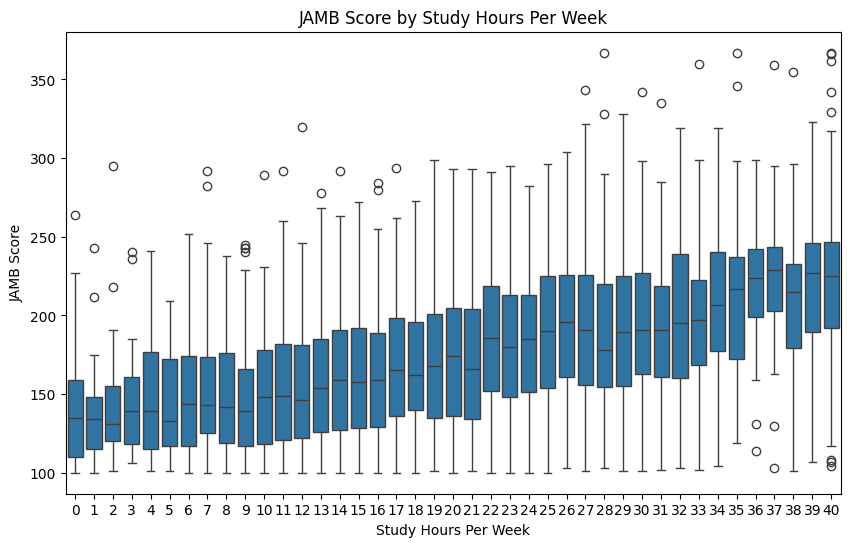

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Study_Hours_Per_Week', y='JAMB_Score', data=df)
plt.title('JAMB Score by Study Hours Per Week')
plt.xlabel('Study Hours Per Week')
plt.ylabel('JAMB Score')
plt.show()

Boxplot ini menunjukkan bagaimana distribusi skor JAMB berubah berdasarkan jumlah jam belajar per minggu. Anda dapat melihat apakah siswa yang belajar lebih banyak per minggu memiliki median skor yang lebih tinggi dan bagaimana persebarannya.

**Hubungan antara Kehadiran dan Skor JAMB**

Scatter plot ini memungkinkan kita untuk melihat apakah ada hubungan linear antara kehadiran dan skor JAMB. Jika terdapat tren positif (titik-titik cenderung naik), maka kehadiran lebih banyak mungkin berhubungan dengan skor JAMB yang lebih tinggi. Jika tidak ada pola yang jelas, hal ini mungkin menunjukkan bahwa faktor lain lebih mempengaruhi performa siswa.

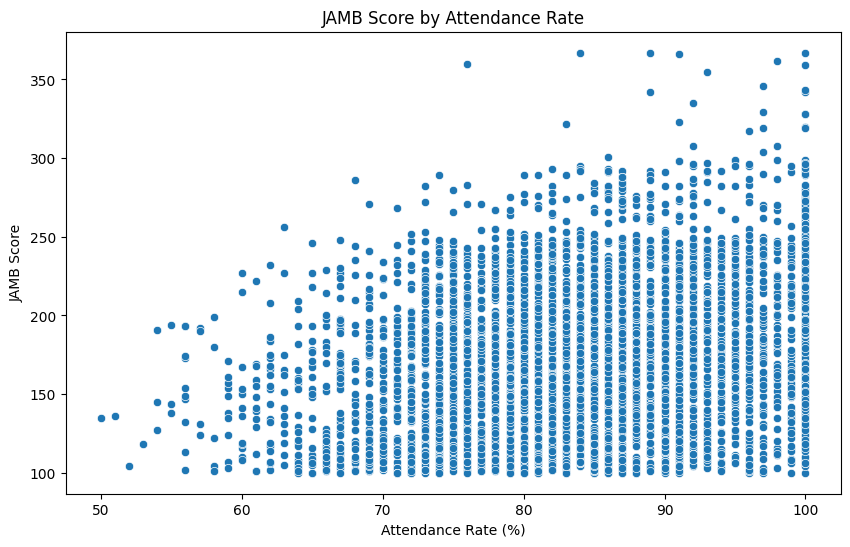

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance_Rate', y='JAMB_Score', data=df)
plt.title('JAMB Score by Attendance Rate')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('JAMB Score')
plt.show()

Scatter plot ini memberikan gambaran apakah ada hubungan linear antara kehadiran siswa di sekolah dan performa ujian JAMB. Adanya tren positif ini menunjukkan bahwa semakin tinggi tingkat kehadiran, semakin tinggi skor JAMB.

**Keterlibatan Orang Tua dan Distribusi Skor JAMB**

Bar plot ini menunjukkan bagaimana tingkat keterlibatan orang tua memengaruhi rata-rata skor JAMB. Jika siswa dengan keterlibatan orang tua "High" cenderung memiliki rata-rata skor lebih tinggi dibandingkan dengan siswa yang keterlibatan orang tuanya "Low" atau "Medium", ini menunjukkan betapa pentingnya keterlibatan orang tua dalam mendukung prestasi akademik siswa.

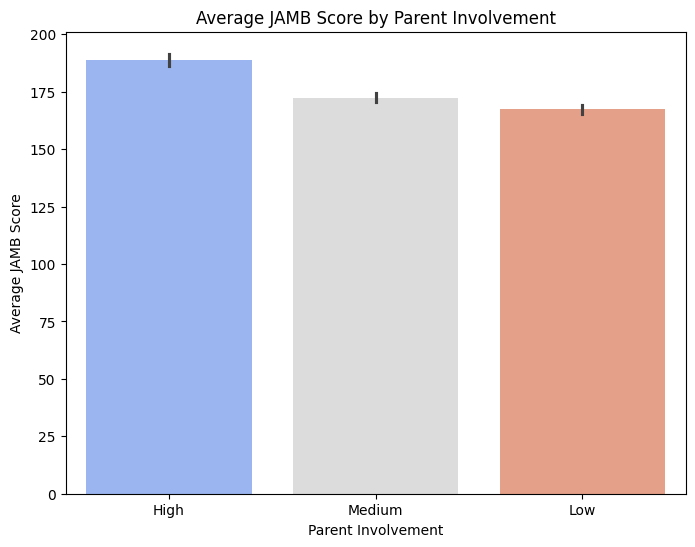

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Parent_Involvement', y='JAMB_Score', hue='Parent_Involvement', data=df, estimator=np.mean, palette='coolwarm', legend=False)
plt.title('Average JAMB Score by Parent Involvement')
plt.xlabel('Parent Involvement')
plt.ylabel('Average JAMB Score')
plt.show()

Melalui bar plot, kita bisa melihat bagaimana tingkat keterlibatan orang tua berhubungan dengan performa akademik siswa, memberikan wawasan penting untuk meningkatkan keterlibatan orang tua.

**Pengaruh Kelas Tambahan terhadap nilai JAMB**

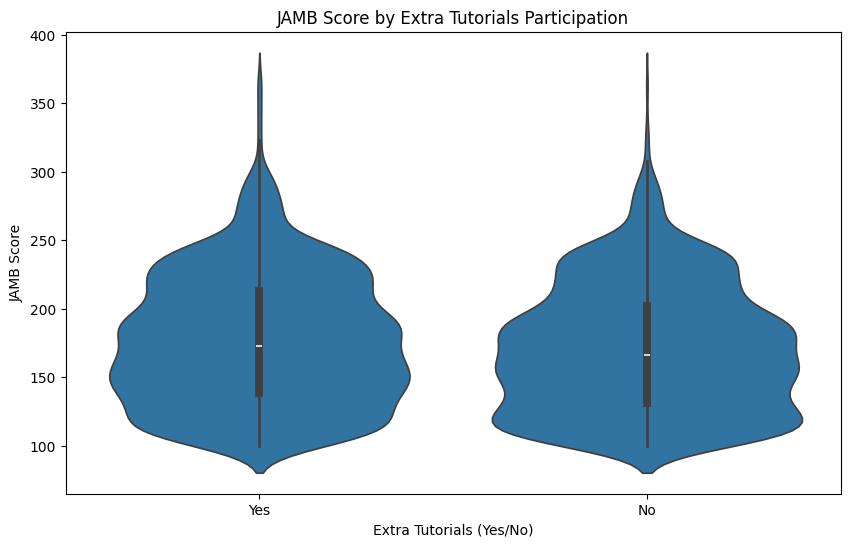

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Extra_Tutorials', y='JAMB_Score', data=df)
plt.title('JAMB Score by Extra Tutorials Participation')
plt.xlabel('Extra Tutorials (Yes/No)')
plt.ylabel('JAMB Score')
plt.show()

Violin plot ini memperlihatkan distribusi skor JAMB untuk siswa yang mengikuti tutorial tambahan versus yang tidak. Distribusi siswa yang mengikuti tutorial tambahan memiliki skor yang lebih tinggi dan lebih merata, ini menunjukkan manfaat signifikan dari mengikuti tutorial.

**Pengaruh Kondisi Sosioekonomi terhadap skor JAMB**

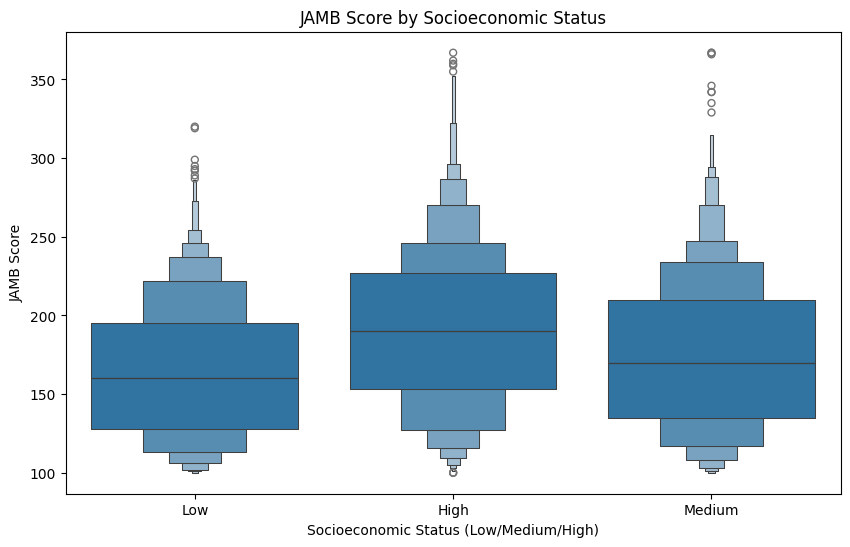

In [15]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Socioeconomic_Status', y='JAMB_Score', data=df)
plt.title('JAMB Score by Socioeconomic Status')
plt.xlabel('Socioeconomic Status (Low/Medium/High)')
plt.ylabel('JAMB Score')
plt.show()

Boxen plot ini menunjukkan distribusi skor JAMB berdasarkan status sosial ekonomi siswa (Low, Medium, High). Siswa dari status sosial ekonomi yang lebih tinggi memiliki distribusi skor yang lebih baik, ini menunjukkan adanya kesenjangan performa berdasarkan latar belakang ekonomi siswa.

# vi. Pengambilan Kesimpulan

Berdasarkan analisis data JAMB, mayoritas siswa memiliki skor di bawah threshold 200, dengan rata-rata skor sebesar 174.07 dan modus 118. Hal ini menunjukkan bahwa banyak siswa belum mencapai standar yang diharapkan, dengan sebagian besar berada jauh di bawah ambang batas tersebut. Ini menjadi indikasi perlunya peningkatan dalam strategi pembelajaran dan dukungan bagi siswa. Dari hasil uji Chi-Square, ditemukan bahwa faktor seperti jumlah jam belajar per minggu, kehadiran di sekolah, kualitas guru, dan keterlibatan orang tua memiliki hubungan yang signifikan dengan performa siswa. Siswa yang menghabiskan lebih banyak waktu untuk belajar dan memiliki guru yang berkualitas lebih baik cenderung mendapatkan skor JAMB yang lebih tinggi.

Selain itu, keterlibatan orang tua dan status sosial ekonomi juga berperan penting. Siswa dengan orang tua yang lebih terlibat dan memiliki status sosial ekonomi lebih baik menunjukkan hasil yang lebih baik dalam ujian. Di sisi lain, variabel seperti jarak ke sekolah, lokasi sekolah (urban/rural), usia, dan jenis kelamin tidak memiliki dampak yang signifikan terhadap hasil JAMB. Ini menunjukkan bahwa akses fisik ke sekolah atau karakteristik demografis tertentu tidak mempengaruhi secara langsung kinerja akademik siswa.

Insight yang dapat diambil dari analisis ini adalah pentingnya peningkatan kualitas pengajaran dan keterlibatan orang tua dalam pendidikan siswa. Upaya tambahan seperti penyediaan akses yang lebih baik ke materi pembelajaran dan pemberian tutorial tambahan dapat membantu siswa yang berada di bawah threshold untuk meningkatkan performa mereka. Fokus pada pengembangan strategi belajar yang efektif dan memastikan keterlibatan yang kuat dari pihak sekolah dan keluarga akan sangat bermanfaat dalam mendorong lebih banyak siswa mencapai skor di atas 200.